# Hopfield Model : Static & Local threshold

**Libraries**

In [1]:
%pylab inline
from evaCure import main, parameters
import Tools.ext as Te
import Tools.display as Td
import Tools.functions as Tf
from ipywidgets import StaticInteract, RangeWidget

Populating the interactive namespace from numpy and matplotlib


**Parameters**

In [2]:
conn = {'connAd': Te.Pdir('Connectomes/Hagmann/SC_D_998_0.npy'),
        'normC': 1.}

model = {'model': 'HopfieldBasedStatic',
         'tauT': 80,
         'threshold': 'local',
         'P': 1,
         'G': 900.,}

noise = {'stdD_x': 0.0,
         'stdD_T': 0.0,
         'colors': ['white','white']}

out = ['x', 'A', 'rtime', 'theta']

other = {'init': 'rand',
         'dens': 0.5,
         'rperiod': 100}

T0 = 5000 # 0.1 ms
TF = 100000 # 0.1 ms
sx = 0.2
sT = 0.2

In [3]:
pattAd = Te.Pdir('Simulations/Patterns/SL_900_pC/Cand_S/patterns_P_1.00_f0_0.50.npy')
ksix = Te.data2array(pattAd.replace('Cand_S','Cand_X'))
ksiA = Te.data2array(pattAd.replace('Cand_X','Cand_S'))
m = randint(ksix.shape[0])
other.update({'init': 'ext',
              'x':ksix[m],
              'A':ksiA[m]})

**Initialization**

In [4]:
eva = main.evaCure(evaCon=conn, evaNoi=noise, evaMod=model, out=out, **other)

**Run**

In [5]:
for i in range(T0):
    eva.update()
pattern0 = eva.evaMod.getAttr(['x','A'])

eva.evaNoi.updateNoise(stdD_x=sx, stdD_T=sT)

Td.tic()
for i in xrange(TF):
    eva.update()
    Td.estimAndPercent(i, TF)
pattern1 = eva.evaMod.getAttr(['x','A'])
Td.tac('h')

Time estimated: 0h00min22s
(10%), time elapsed: 1.96s
(20%), time elapsed: 3.94s
(30%), time elapsed: 5.90s
(40%), time elapsed: 7.88s
(50%), time elapsed: 9.83s
(60%), time elapsed: 11.79s
(70%), time elapsed: 13.75s
(80%), time elapsed: 15.70s
(90%), time elapsed: 17.65s
(100%), time elapsed: 19.60s
Time elapsed: 0h00min19s


**Display**

In [17]:
T1 = 0 #T0 - 1000
T2 = -1
t = array(eva.out['rtime'][T1:T2]) * eva.evaMod.dt / 1000 #s
x = array(eva.out['x'][T1:T2])
A = array(eva.out['A'][T1:T2])
theta = array(eva.out['theta'][T1:T2])

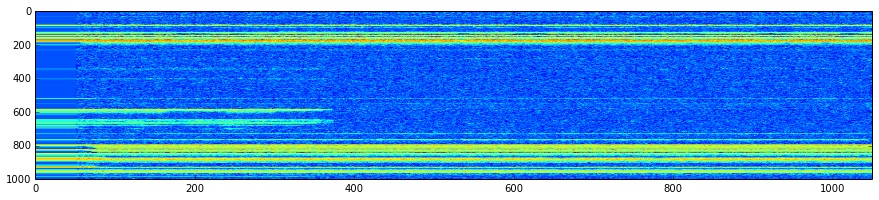

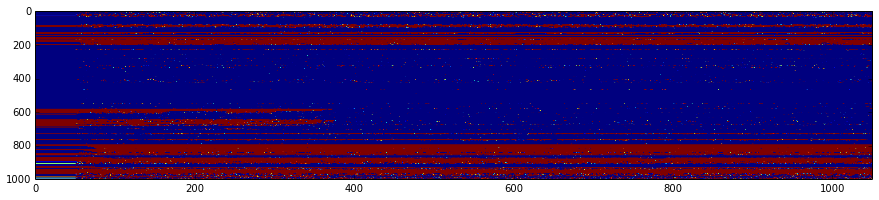

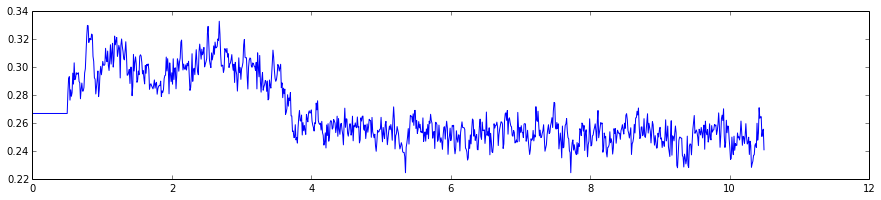

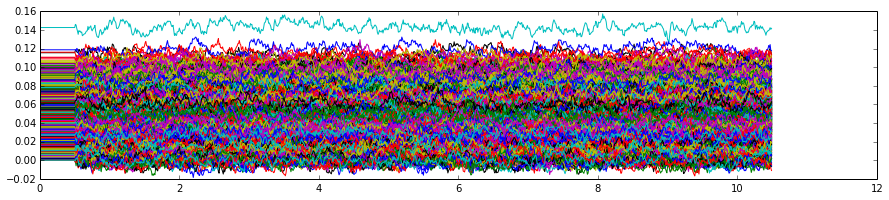

In [18]:
figure(figsize=(15,3)); imshow(x.T, aspect='auto')
figure(figsize=(15,3)); imshow(A.T, aspect='auto') 
figure(figsize=(15,3)); plot(t, A.mean(1)) 
figure(figsize=(15,3)); plot(t, theta) ; show()

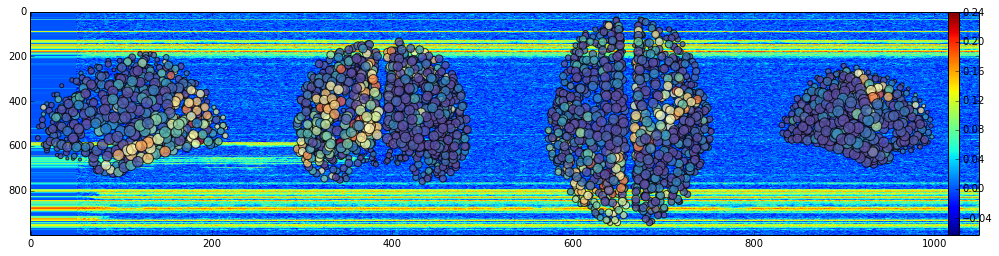

In [31]:
centres = Te.data2array('/home/golos/Main/Programs/Connectomes/Hagmann/Centers_Hagmann_998.txt')[:,1:].astype(float)
f = figure(figsize=(17,4)); imshow(x.T, aspect='auto')
Td.parcelFromCenters(x[-1], centres, fig=f, s=2, alpha=0.75); colorbar() ; show()

In [69]:
V,PC = Tf.fPCA(x)

3 Principals: 26% + 7% + 1% = 34%


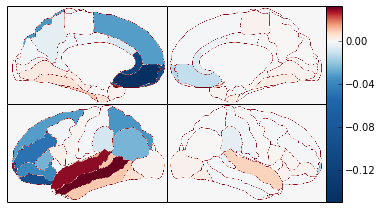

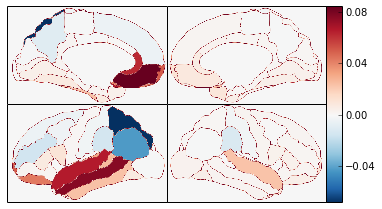

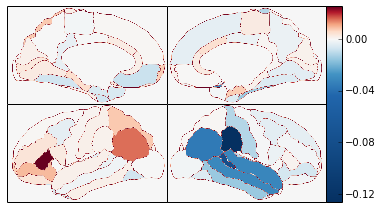

In [21]:
prct = 100. / V.sum()
print '3 Principals: %i%% + %i%% + %i%% = %i%%' %(V[0]*prct, V[1]*prct, V[2]*prct, V[:3].sum()*prct)
Ims = Td.initParcellation()
Td.hagmannParcellation(PC[0], Ims=Ims)
Td.hagmannParcellation(PC[1], Ims=Ims)
Td.hagmannParcellation(PC[2], Ims=Ims)

In [70]:
CPC = array([x.dot(PC[p]) for p in range(len(PC))])
CPA = array([A.dot(PC[p]) for p in range(len(PC))])
CPP = array([A.dot(ksiA[p]) for p in range(len(ksiA))])

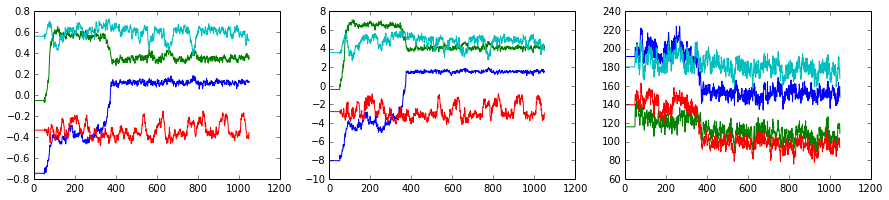

In [78]:
figure(figsize=(15,3))
for i in range(4):
    subplot(131); plot(CPC[i], lw=1)
    subplot(132); plot(CPA[i], lw=1)
    subplot(133); plot(CPP[i], lw=1)

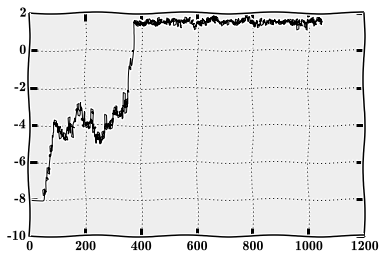

In [100]:
def view_image(t):
    fig, ax = plt.subplots(subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='k', lw=1)
    ax.plot(CPA[t], 'k', lw=1)
    fig.show()
    
interact(view_image, t=(0,13));

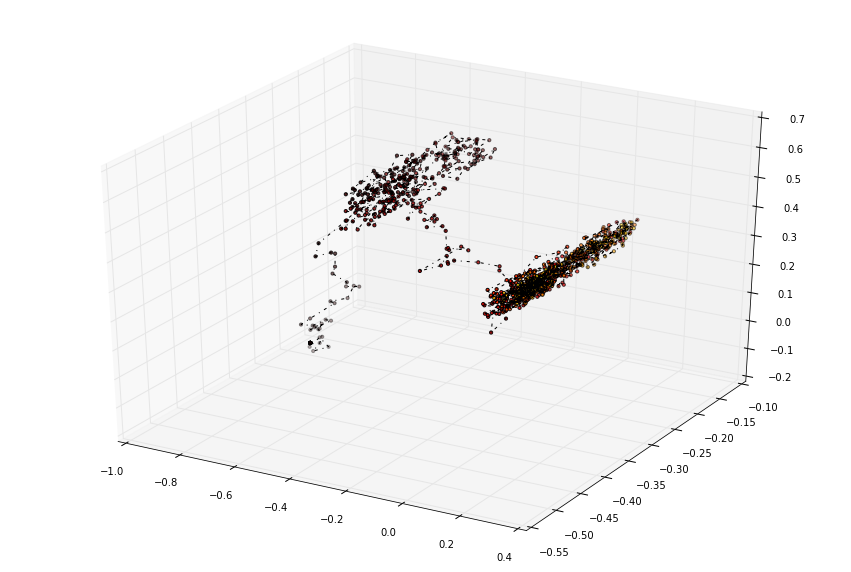

In [39]:
S = [CPC[0], CPC[1], CPC[2]]; shuffle(S)
Td.plot4D(S[0], S[1], S[2], 'hot', kwaSca={'s':10}, fig=figure(figsize=(15,10)), line=1)

In [23]:
from qutip.ipynbtools import version_table
version_table()

QuTiP warning: cython setup failed: invalid literal for int() with base 10: '1post0'
